In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
data = pd.read_csv('StudentPerformanceFactors.csv')

In [40]:
data.drop_duplicates(inplace=True)
data.dropna(inplace = True)
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'Yes': 1, 'No': 0})

In [41]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,Public,Neutral,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,0,7,76,Medium,1,1,High,Medium,Public,Positive,2,0,High School,Near,Female,68
6603,23,76,High,Medium,0,8,81,Medium,1,3,Low,High,Public,Positive,2,0,High School,Near,Female,69
6604,20,90,Medium,Low,1,6,65,Low,1,3,Low,Medium,Public,Negative,2,0,Postgraduate,Near,Female,68
6605,10,86,High,High,1,6,91,High,1,2,Low,Medium,Private,Positive,3,0,High School,Far,Female,68


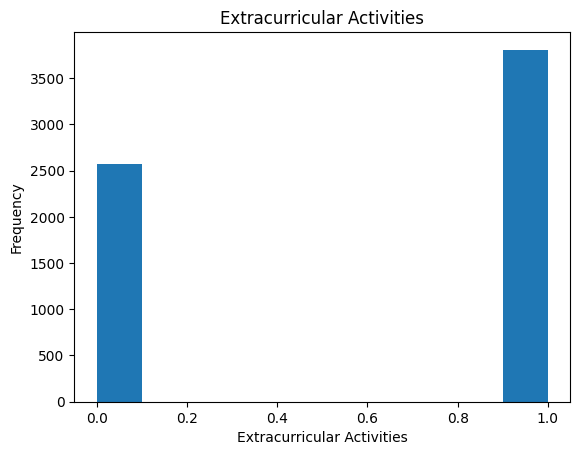

In [42]:
plt.hist(data['Extracurricular_Activities'])
plt.title("Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Frequency")
plt.show()

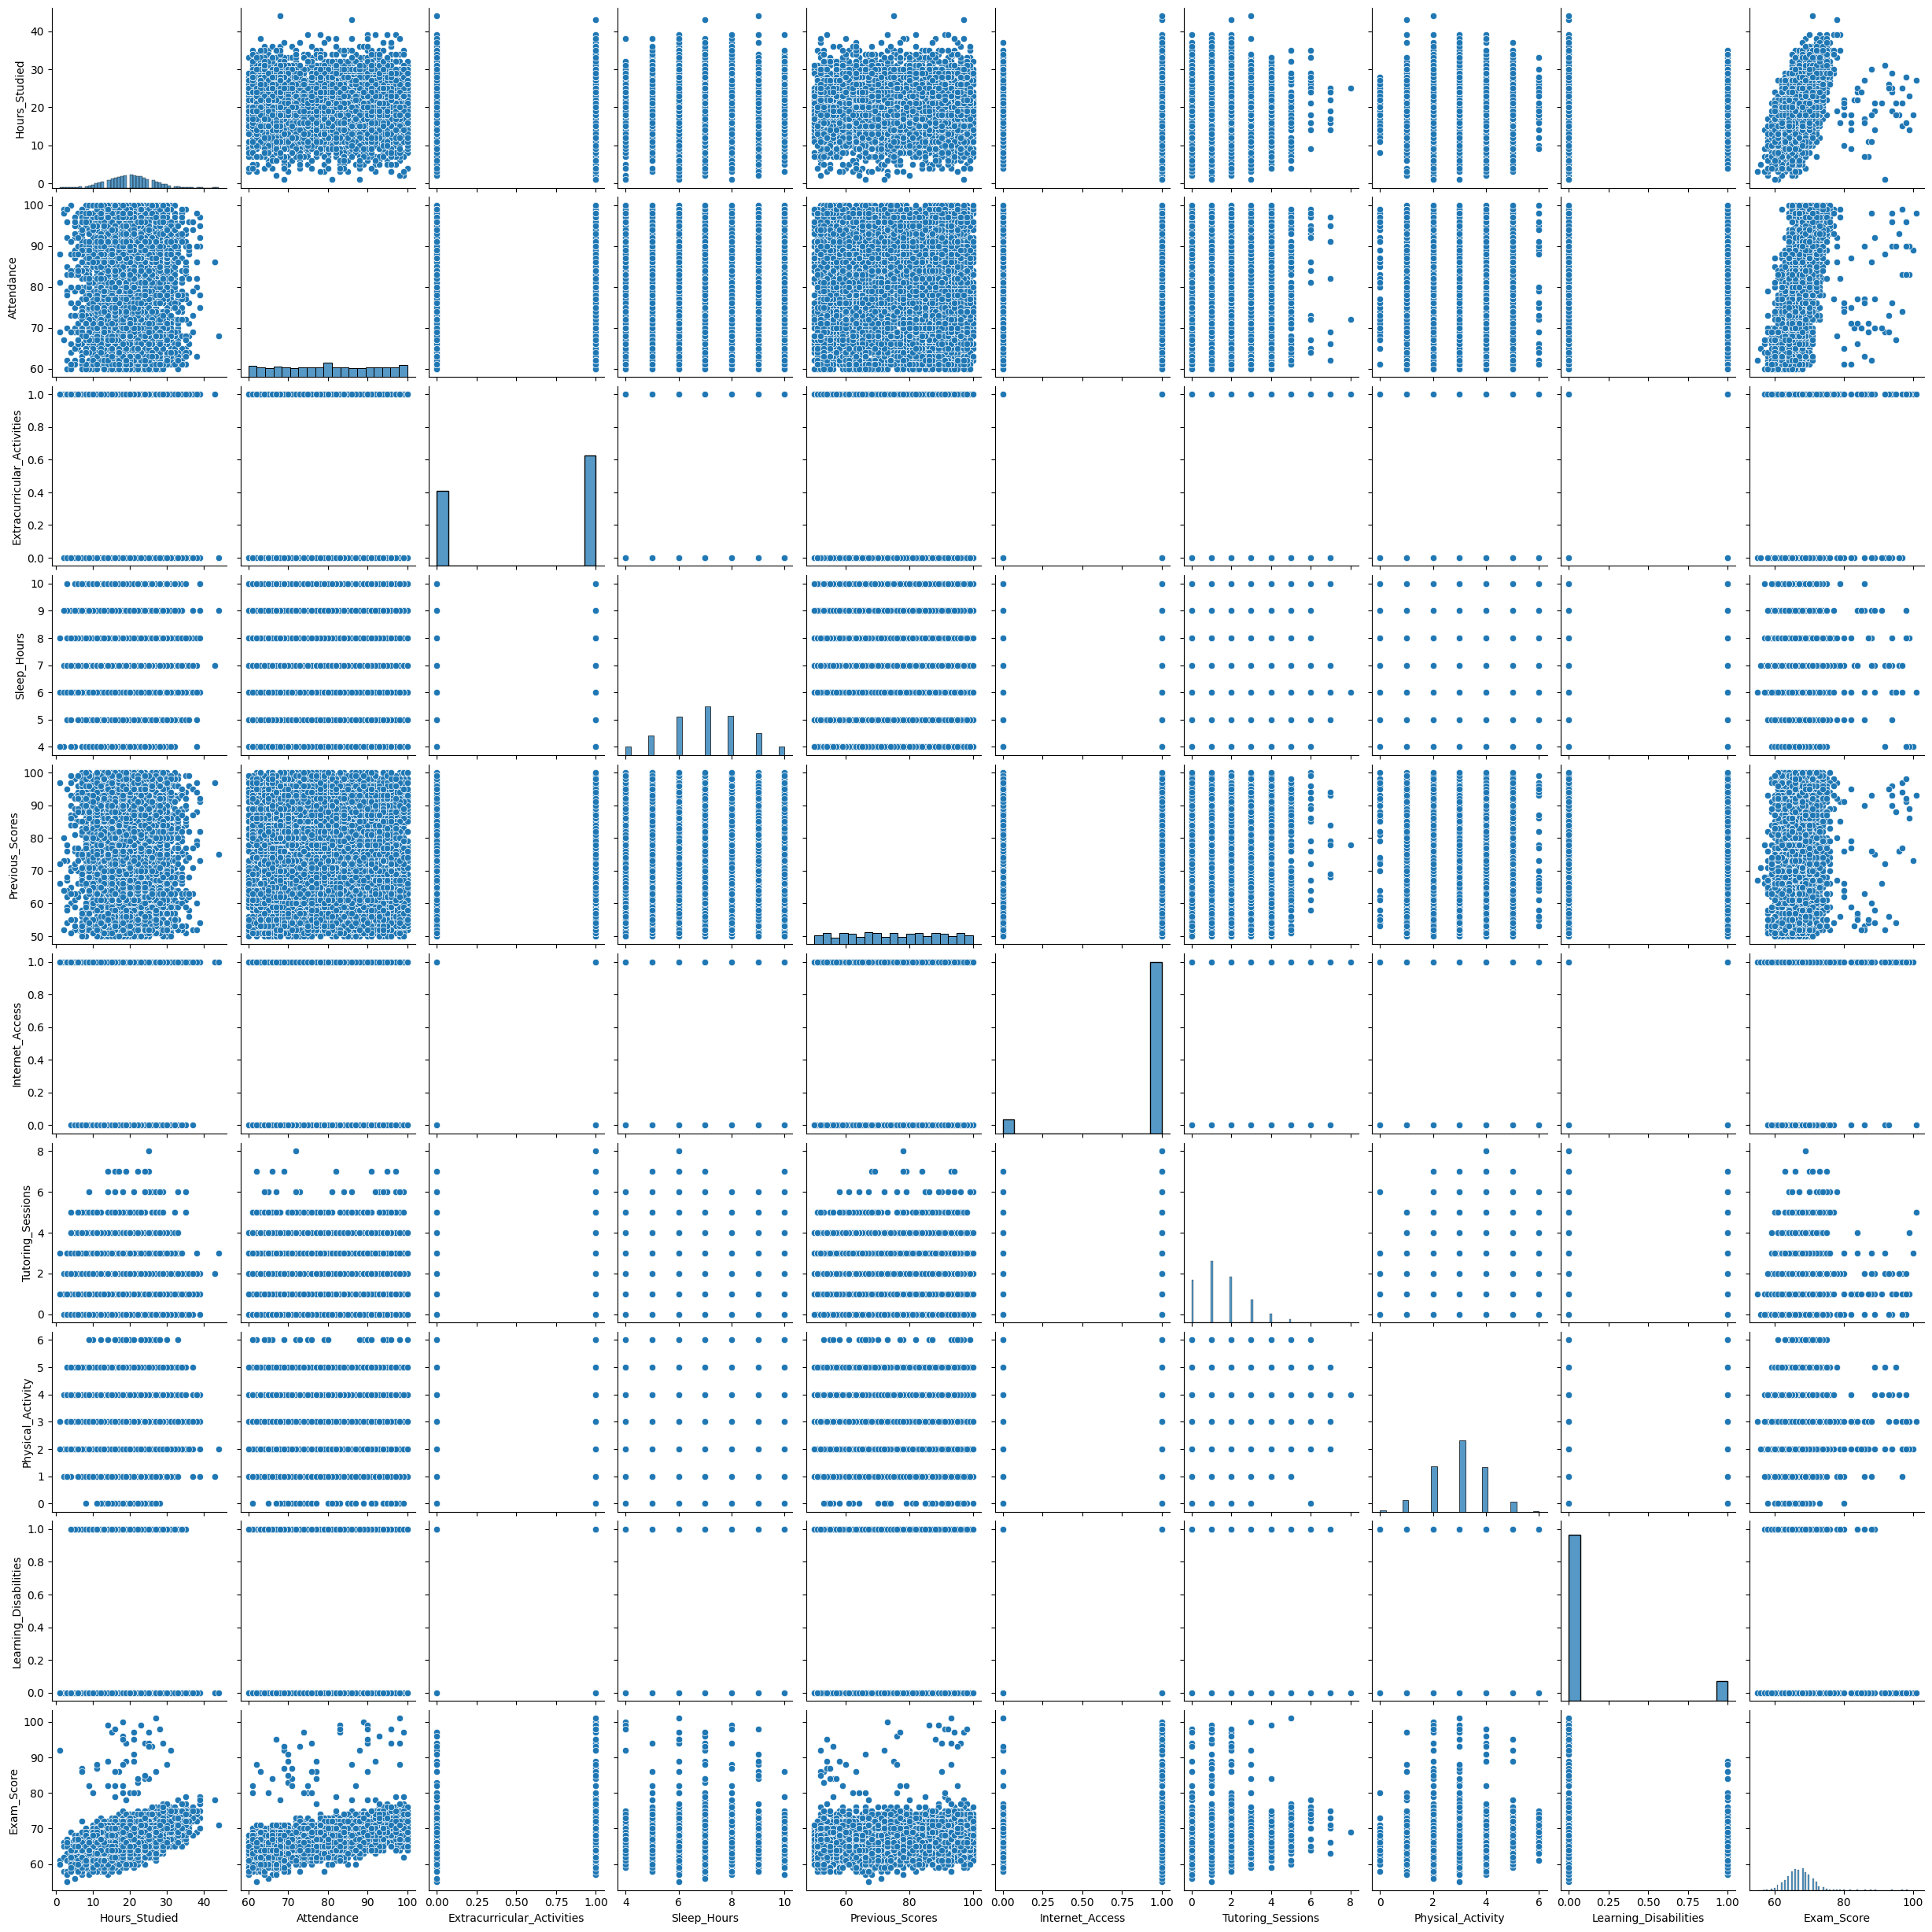

In [44]:
sns.pairplot(data)

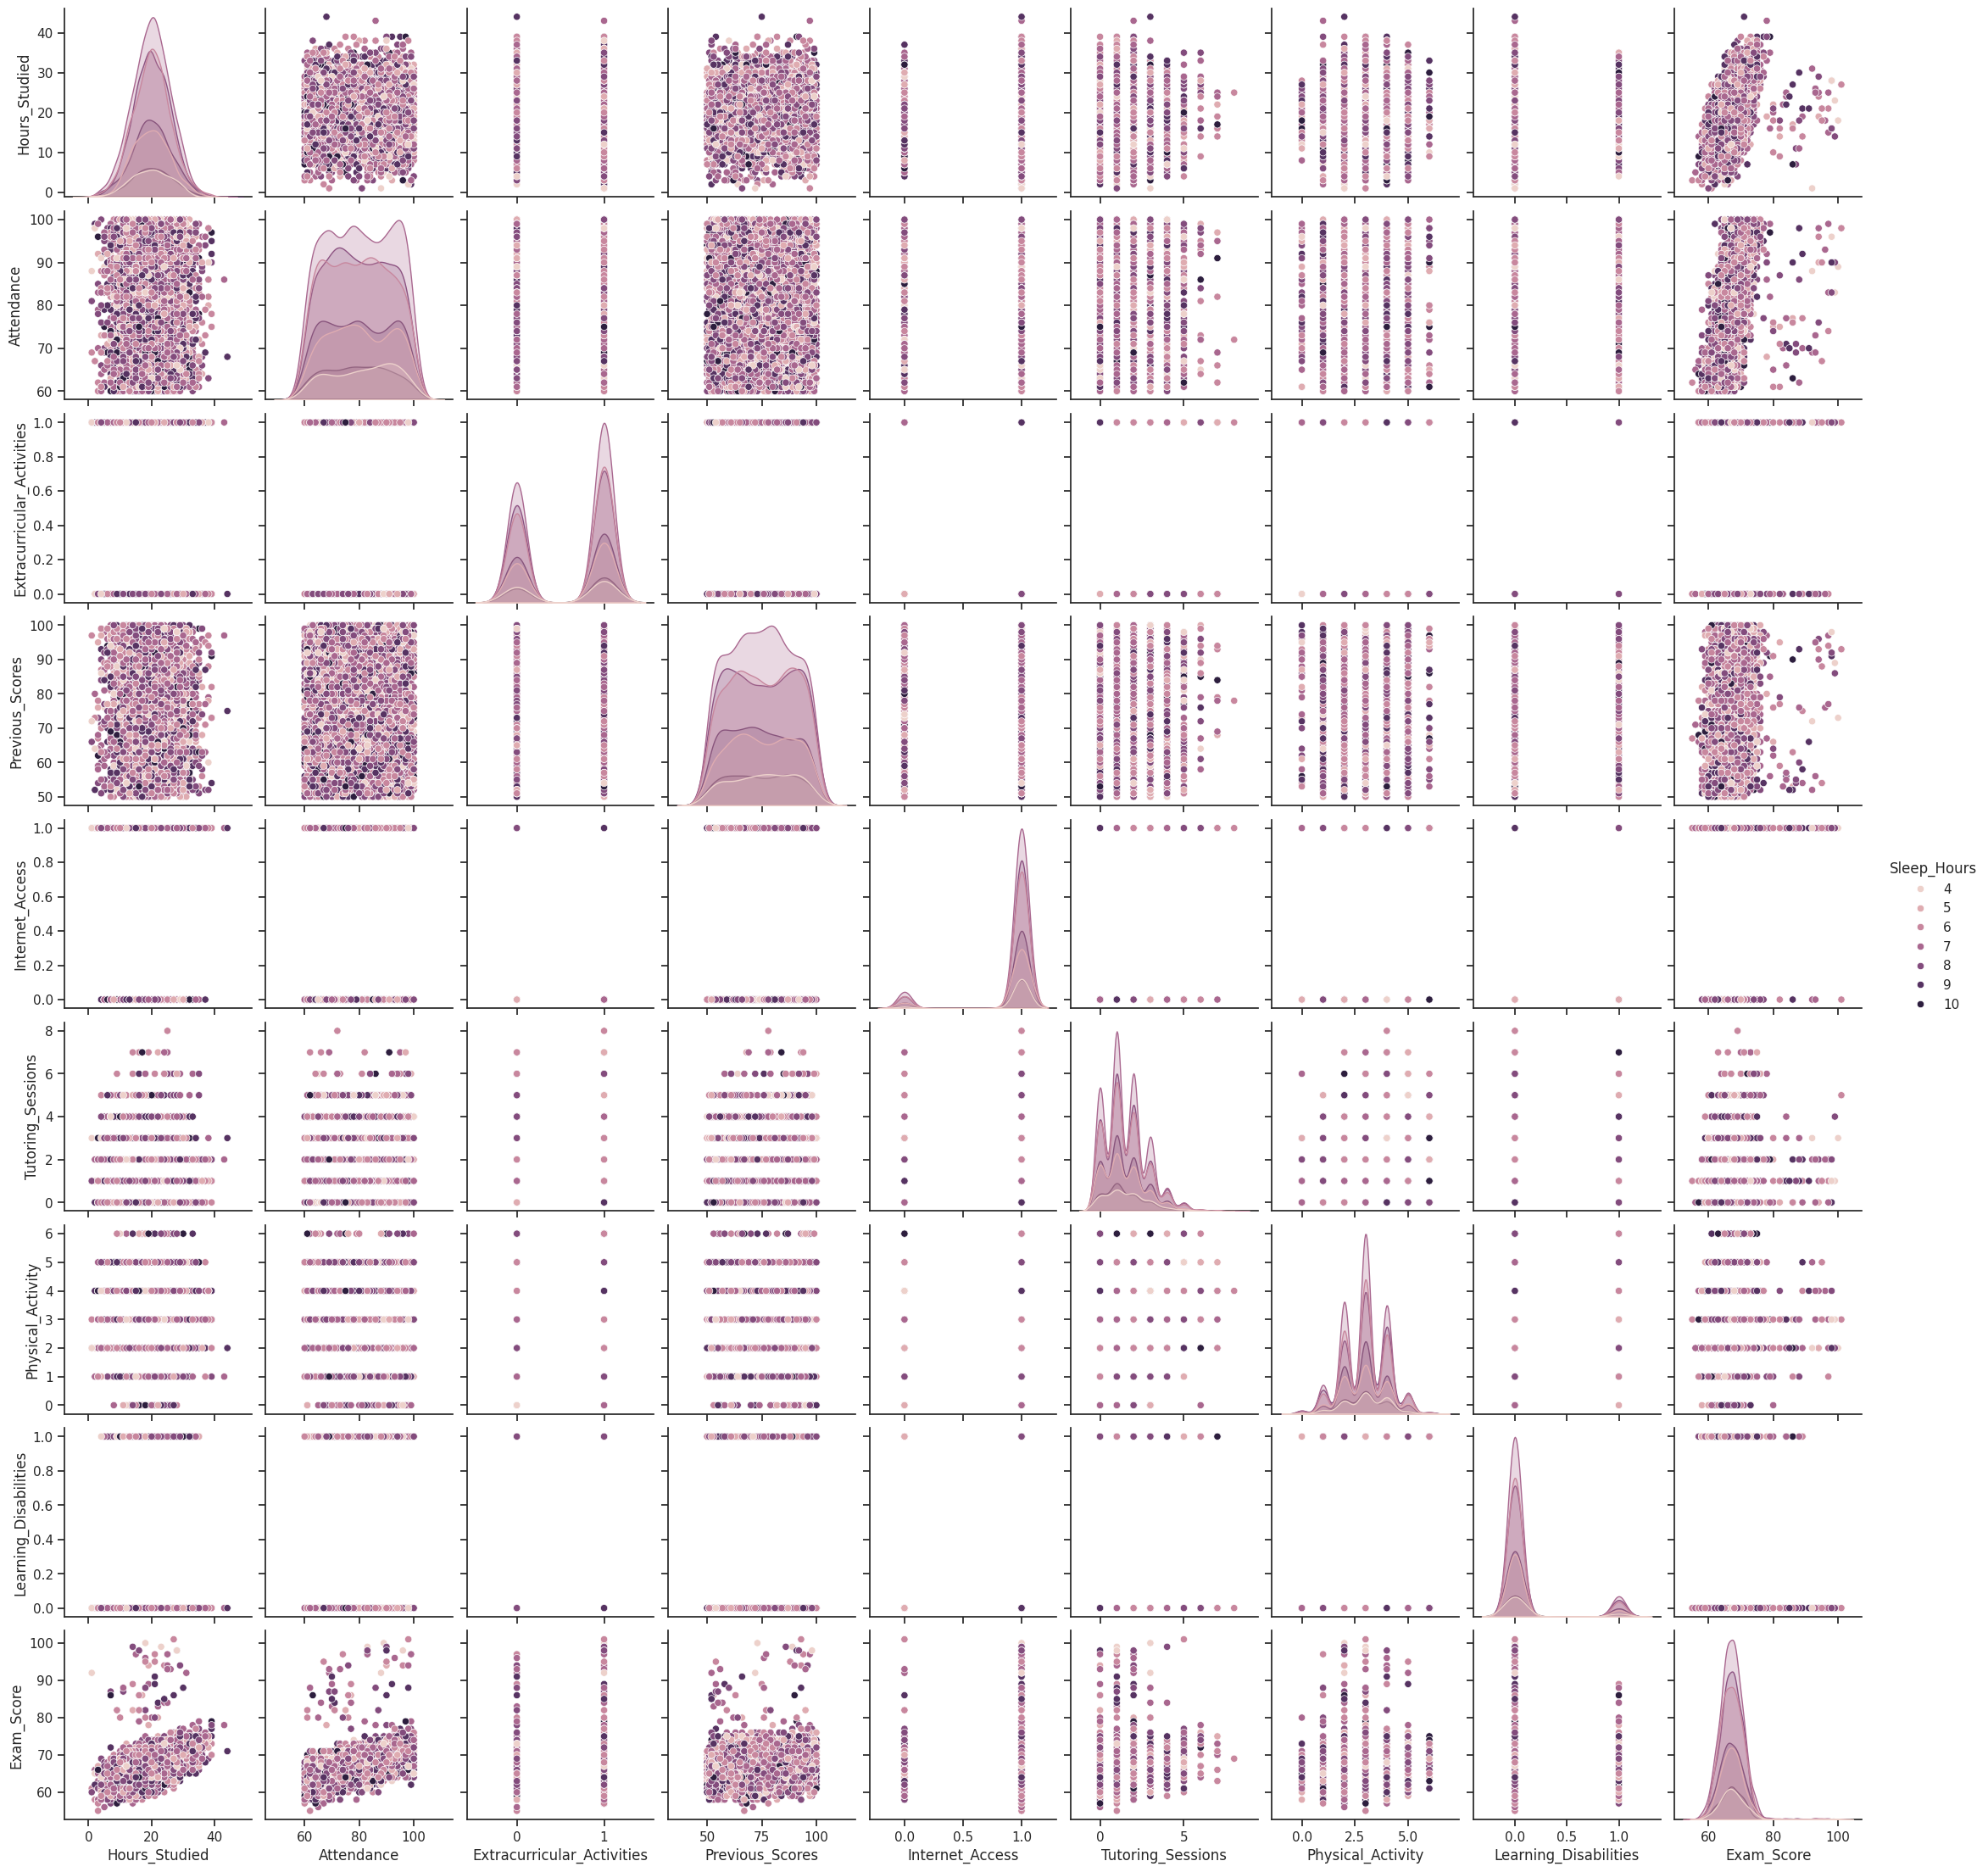

In [45]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Sleep_Hours")

<Axes: xlabel='Physical_Activity', ylabel='Extracurricular_Activities'>

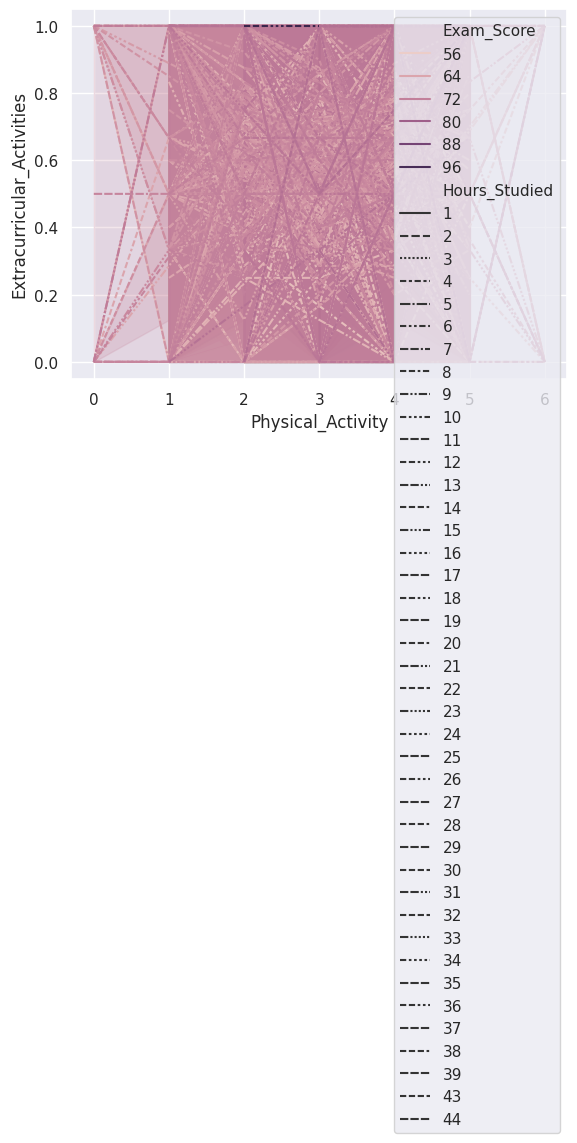

In [49]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="", y="Extracurricular_Activities",
             hue="Physical_Activity", style="Physical_Activity",
             data=data)
